In [116]:
import sys
sys.path.append(r'C:\Users\KDP-50\OneDrive\바탕 화면\Python06\MyClass')
from DL_Modules import *
from DL_func import *
from DL_Reg_Class import *
from ML_preprocessing import *

In [117]:
import os

In [118]:
FOLDER = './excels/'
TRAIN_CSV = './Project/chung_train.csv'

In [119]:
def make_dataset(dir_path, file_path):
    # 폴더 안에 파일을 가져오기
    train_files = os.listdir(dir_path)
    file_flag = True

    for file in train_files:
        print(file, dir_path+file, os.path.exists(dir_path+file))

        # 파일을 읽을 때 첫 번째 행을 건너뛰기
        with open(dir_path+file, mode='r', encoding="cp949") as f: 
            if file_flag: 
                alldata=f.read()
                file_flag = False
            else:
                f.readline()
                alldata=f.read()
            print(alldata)
        # 나머지 데이터를 지정된 파일에 저장

        with open(file_path, mode='a', encoding="utf-8") as wf:
            wf.write(alldata)

In [120]:
# make_dataset(FOLDER, 'chung_train.csv')

In [121]:
totalDF = pd.read_csv('total.csv')
totalDF.shape

(620367, 59)

In [122]:
totalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620367 entries, 0 to 620366
Data columns (total 59 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   지점                   620367 non-null  int64  
 1   일시                   620367 non-null  object 
 2   평균기온(°C)             619544 non-null  float64
 3   최저기온(°C)             620138 non-null  float64
 4   최저기온 시각(hhmi)        619944 non-null  float64
 5   최고기온(°C)             620131 non-null  float64
 6   최고기온 시각(hhmi)        619944 non-null  float64
 7   강수 계속시간(hr)          87060 non-null   float64
 8   10분 최다 강수량(mm)       146679 non-null  float64
 9   10분 최다강수량 시각(hhmi)   107002 non-null  float64
 10  1시간 최다강수량(mm)        146708 non-null  float64
 11  1시간 최다 강수량 시각(hhmi)  110432 non-null  float64
 12  일강수량(mm)             227800 non-null  float64
 13  최대 순간 풍속(m/s)        619722 non-null  float64
 14  최대 순간 풍속 풍향(16방위)    619721 non-null  float64
 15  최대 순간풍속 시각(hhmi) 

In [123]:
# check=totalDF.corr()['일강수량(mm)']

In [124]:
# check.sort_values(ascending=False)

In [125]:
totalDF.columns

Index(['지점', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '평균 이슬점온도(°C)',
       '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)', '평균 증기압(hPa)',
       '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)',
       '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조 시간(hr)',
       '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사(MJ/m2)', '일 최심신적설(cm)',
       '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)', '합계 3시간 신적설(cm)',
       '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0m 지중온도(°C)', '1.5m 지중온도(°C)',
       '3.0m 지중온도(°C)', '5.0m 지중온도(°C

In [151]:
def changed_df(dataDF):
    dataDF['일시']=pd.to_datetime(dataDF['일시'])
    dataDF = dataDF[dataDF['일시'].dt.month.isin([1, 2, 12])]
    dataDF=dataDF[['일시','평균 증기압(hPa)','평균기온(°C)','최고기온(°C)','최저기온(°C)']]
    return dataDF

In [152]:
totalDF

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr)
0,100,2004-01-01,-2.1,-3.9,718.0,0.0,1432.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN
1,100,2004-01-02,-2.9,-5.9,2339.0,-0.4,1219.0,3.83,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN
2,100,2004-01-03,-2.5,-5.5,0.0,2.0,1432.0,3.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100,2004-01-04,-3.9,-12.0,742.0,3.7,1331.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100,2004-01-05,-3.9,-11.4,621.0,4.8,1344.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620362,99,2023-12-27,-2.3,-7.9,805.0,5.5,1447.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.8,1.2,NaN,NaN
620363,99,2023-12-28,-2.3,-8.2,757.0,3.5,1408.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.9,NaN,NaN
620364,99,2023-12-29,-0.7,-4.9,801.0,3.5,1428.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.7,NaN,NaN
620365,99,2023-12-30,-1.0,-4.7,210.0,0.6,2333.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.2,0.3,NaN,NaN


In [153]:
newDF = changed_df(totalDF)
newDF

,일시,평균 증기압(hPa),평균기온(°C),최고기온(°C),최저기온(°C)
0,2004-01-01,3.5,-2.1,0.0,-3.9
1,2004-01-02,3.5,-2.9,-0.4,-5.9
2,2004-01-03,2.8,-2.5,2.0,-5.5
3,2004-01-04,1.6,-3.9,3.7,-12.0
4,2004-01-05,1.8,-3.9,4.8,-11.4
...,...,...,...,...,...
620362,2023-12-27,4.1,-2.3,5.5,-7.9
620363,2023-12-28,4.1,-2.3,3.5,-8.2
620364,2023-12-29,4.6,-0.7,3.5,-4.9
620365,2023-12-30,5.5,-1.0,0.6,-4.7


In [154]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153138 entries, 0 to 620366
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   일시           153138 non-null  datetime64[ns]
 1   평균 증기압(hPa)  152887 non-null  float64       
 2   평균기온(°C)     152925 non-null  float64       
 3   최고기온(°C)     153036 non-null  float64       
 4   최저기온(°C)     153045 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.0 MB


In [155]:
newDF.isnull().sum()

일시               0
평균 증기압(hPa)    251
평균기온(°C)       213
최고기온(°C)       102
최저기온(°C)        93
dtype: int64

In [156]:
newDF.shape

(153138, 5)

In [157]:
def fill_nan(dataDF, column):
    mean_value=dataDF[column].mean()
    dataDF[column]=dataDF[column].fillna(mean_value)

In [158]:
# fill_nan(newDF, '일강수량(mm)')
# fill_nan(newDF, '최소 상대습도(%)')
# fill_nan(newDF, '평균 상대습도(%)')
# fill_nan(newDF, '평균 전운량(1/10)')
fill_nan(newDF, '평균 증기압(hPa)')
fill_nan(newDF, '평균기온(°C)')
fill_nan(newDF, '최고기온(°C)')
fill_nan(newDF, '최저기온(°C)')

In [159]:
newDF.isnull().sum()

일시             0
평균 증기압(hPa)    0
평균기온(°C)       0
최고기온(°C)       0
최저기온(°C)       0
dtype: int64

In [160]:
newDF.corr()

,일시,평균 증기압(hPa),평균기온(°C),최고기온(°C),최저기온(°C)
일시,1.000000,0.060639,0.063123,0.064726,0.043621
평균 증기압(hPa),0.060639,1.000000,0.788470,0.663360,0.760222
평균기온(°C),0.063123,0.788470,1.000000,0.896742,0.923215
최고기온(°C),0.064726,0.663360,0.896742,1.000000,0.701788
최저기온(°C),0.043621,0.760222,0.923215,0.701788,1.000000


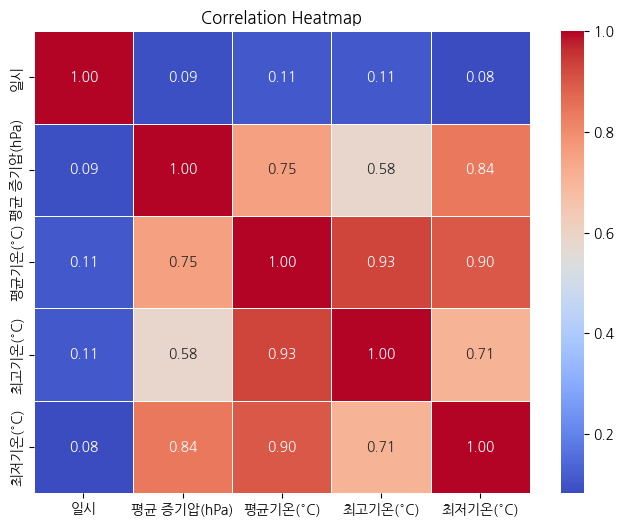

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd

# 데이터 정의
data = {
    '일시': [1.000000, 0.090608, 0.107335, 0.107570, 0.081919],
    '평균 증기압(hPa)': [0.090608, 1.000000, 0.754264, 0.581060, 0.838754],
    '평균기온(°C)': [0.107335, 0.754264, 1.000000, 0.931718, 0.898993],
    '최고기온(°C)': [0.107570, 0.581060, 0.931718, 1.000000, 0.706632],
    '최저기온(°C)': [0.081919, 0.838754, 0.898993, 0.706632, 1.000000]
}

# 데이터프레임 생성
df = pd.DataFrame(data, index=['일시', '평균 증기압(hPa)', '평균기온(°C)', '최고기온(°C)', '최저기온(°C)'])

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [162]:
newDF

,일시,평균 증기압(hPa),평균기온(°C),최고기온(°C),최저기온(°C)
0,2004-01-01,3.5,-2.1,0.0,-3.9
1,2004-01-02,3.5,-2.9,-0.4,-5.9
2,2004-01-03,2.8,-2.5,2.0,-5.5
3,2004-01-04,1.6,-3.9,3.7,-12.0
4,2004-01-05,1.8,-3.9,4.8,-11.4
...,...,...,...,...,...
620362,2023-12-27,4.1,-2.3,5.5,-7.9
620363,2023-12-28,4.1,-2.3,3.5,-8.2
620364,2023-12-29,4.6,-0.7,3.5,-4.9
620365,2023-12-30,5.5,-1.0,0.6,-4.7


In [163]:
featureDF = newDF.drop(columns=['평균기온(°C)'])
targetDF = newDF[['일시','평균기온(°C)']]

In [164]:
idx=~(targetDF['일시'].dt.dayofyear-featureDF['일시'].dt.dayofyear==1)
print(featureDF[idx].head(2))
print(targetDF[idx].head(2))

          일시  평균 증기압(hPa)  최고기온(°C)  최저기온(°C)
0 2004-01-01          3.5       0.0      -3.9
1 2004-01-02          3.5      -0.4      -5.9
          일시  평균기온(°C)
0 2004-01-01      -2.1
1 2004-01-02      -2.9


In [165]:
targetDF

,일시,평균기온(°C)
0,2004-01-01,-2.1
1,2004-01-02,-2.9
2,2004-01-03,-2.5
3,2004-01-04,-3.9
4,2004-01-05,-3.9
...,...,...
620362,2023-12-27,-2.3
620363,2023-12-28,-2.3
620364,2023-12-29,-0.7
620365,2023-12-30,-1.0


In [176]:
# targetDF=targetDF.drop(index=60)
targetDF.reset_index(inplace=True, drop=True)
featureDF.reset_index(inplace=True, drop=True)

In [178]:
featureDF.head(2)

,일시,평균 증기압(hPa),최고기온(°C),최저기온(°C)
0,2004-01-01,3.5,0.0,-3.9
1,2004-01-02,3.5,-0.4,-5.9


In [179]:
featureDF.tail(2)

,일시,평균 증기압(hPa),최고기온(°C),최저기온(°C)
153136,2023-12-30,5.5,0.6,-4.7
153137,2023-12-31,6.1,6.0,-3.3


In [180]:
targetDF.head(2)

,일시,평균기온(°C)
0,2004-01-01,-2.1
1,2004-01-02,-2.9


In [182]:
targetDF.shape, featureDF.shape

((153138, 2), (153138, 4))

In [183]:
featureDF=featureDF.drop(columns=['일시'])
featureDF.head()

,평균 증기압(hPa),최고기온(°C),최저기온(°C)
0,3.5,0.0,-3.9
1,3.5,-0.4,-5.9
2,2.8,2.0,-5.5
3,1.6,3.7,-12.0
4,1.8,4.8,-11.4


In [184]:
featureDF.shape

(153138, 3)

In [185]:
targetDF=targetDF.drop(columns=['일시'])
targetDF.head()

,평균기온(°C)
0,-2.1
1,-2.9
2,-2.5
3,-3.9
4,-3.9


In [186]:
targetDF.shape

(153138, 1)

In [187]:
sScale(featureDF)

array([[-0.30659353, -1.22228583,  0.0520316 ],
       [-0.30659353, -1.30419427, -0.33475849],
       [-0.65490869, -0.81274367, -0.25740047],
       ...,
       [ 0.24075887, -0.50558705, -0.14136344],
       [ 0.68859265, -1.09942319, -0.10268444],
       [ 0.98714851,  0.00634066,  0.16806863]])

In [188]:
# - 커스텀데이터셋 인스턴스 생성
dataDS=MyDataset(featureDF, targetDF)

In [189]:
# 학습 준비
# 하이퍼 파라미터 설정

EPOCHS = 100
BATCH_SIZE = 128
LR = 0.01

BATCH_CNT = newDF.shape[0]//BATCH_SIZE
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f'BATCH_CNT: {BATCH_CNT}')

BATCH_CNT: 1196


In [190]:
# model=MyRegModel(4)
model=KeyDynamicModel(3,1000,1,1000,2000,3000)

In [191]:
print(model)

KeyDynamicModel(
  (in_layer): Linear(in_features=3, out_features=1000, bias=True)
  (h_layers): ModuleList(
    (0): Linear(in_features=1000, out_features=2000, bias=True)
    (1): Linear(in_features=2000, out_features=3000, bias=True)
  )
  (out_layer): Linear(in_features=3000, out_features=1, bias=True)
)


In [192]:
# 데이터셋 인스턴스 생성
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=10)

print(f'[X_train(shape): {X_train.shape} (type): {type(X_train)}], X_test: {X_test.shape}, X_val: {X_val.shape}')
print(f'[y_train(shape): {y_train.shape} (type): {type(y_train)}], y_test: {y_test.shape}, y_val: {y_val.shape}')
print(f'[y_train(value_counts()): {y_train.value_counts()/y_train.shape[0]}, y_test(value_counts()): {y_test.value_counts()/y_test.shape[0]}, y_val(value_counts()): {y_val.value_counts()/y_val.shape[0]}')

[X_train(shape): (86139, 3) (type): <class 'pandas.core.frame.DataFrame'>], X_test: (38285, 3), X_val: (28714, 3)
[y_train(shape): (86139, 1) (type): <class 'pandas.core.frame.DataFrame'>], y_test: (38285, 1), y_val: (28714, 1)
[y_train(value_counts()): 평균기온(°C)
 1.3        0.010030
 0.4        0.009798
 1.6        0.009392
 0.5        0.009264
 0.9        0.009241
              ...   
-17.8       0.000012
-18.1       0.000012
-18.9       0.000012
-19.0       0.000012
 18.5       0.000012
Name: count, Length: 353, dtype: float64, y_test(value_counts()): 평균기온(°C)
 0.0        0.009952
 1.3        0.009769
 1.4        0.009743
 1.0        0.009560
 1.7        0.009455
              ...   
-16.7       0.000026
-16.6       0.000026
-16.4       0.000026
-14.4       0.000026
-19.7       0.000026
Name: count, Length: 343, dtype: float64, y_val(value_counts()): 평균기온(°C)
 1.2        0.010030
 0.7        0.009856
 1.5        0.009751
 0.9        0.009682
 0.0        0.009647
              ...   


In [193]:
trainDS=MyDataset(X_train, y_train)
valDS=MyDataset(X_val, y_val)
testDS=MyDataset(X_test, y_test)

In [194]:
# 데이터로더 인스턴스 생성
trainDL=DataLoader(trainDS, batch_size=BATCH_SIZE)

# 최적화 인스턴스 생성
optimizer = optim.Adam(model.parameters(), lr=LR)

# 손실함수 인스턴스 생성
loss_func = nn.L1Loss()

# 성능평가 함수
score_func = R2Score()

In [195]:
# ---------------------------------------------------------------------
# 함수 이름 : training
# 함수 역할 : 배치 크기 만큼 데이터 로딩해서 학습 진행
# 매개 변수 : score_func
# ---------------------------------------------------------------------

def training():
    # 학습 모드로 모델 설정
    model.train()
    # 배치 크기 만큼 데이터 로딩해서 학습 진행
    loss_total, score_total=0,0
    for featureTS, targetTS in trainDL:

        # 학습 진행
        pre_y=model(featureTS)

        # 손실 계산
        loss=loss_func(pre_y, targetTS)
        loss_total+=loss.item()
        
        # 성능평가 계산
        score=score_func(pre_y, targetTS)
        score_total+=score.item()

        # 최적화 진행
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss_total, score_total

# ---------------------------------------------------------------------
# 함수 이름 : validate
# 함수 역할 : 배치 크기 만큼 데이터 로딩해서 검증 진행
# 매개 변수 : loss_func, score_func
# ---------------------------------------------------------------------

def validate():
    # 검증 모드로 모델 설정
    model.eval()
    with torch.no_grad():
        # 검증 데이터셋
        val_featureTS=torch.FloatTensor(valDS.featureDF.values)
        val_targetTS=torch.FloatTensor(valDS.targetDF.values)
        
        # 평가
        pre_val=model(val_featureTS)

        # 손실
        loss_val=loss_func(pre_val, val_targetTS)

        # 성능평가
        score_val=score_func(pre_val, val_targetTS)
    return loss_val, score_val

In [197]:
# 저장 경로
SAVE_PATH='../Project/MyModels/'

In [198]:
loss_history, score_history=[[],[]], [[],[]]
print('TRAIN, VAL 진행')

# => 임계기준 : 10번
BREAK_CNT = 0
THESHOLD = 100

for epoch in range(1, EPOCHS):
    # 학습 모드 함수 호출
    loss_total, score_total = training()

    # 검증 모드 함수 호출
    loss_val, score_val = validate()

    # 에포크당 손실값과 성능평가값 저장
    loss_history[0].append(loss_total/len(trainDL))
    score_history[0].append(score_total/len(trainDL))

    loss_history[1].append(loss_val)
    score_history[1].append(score_val)
    
    # Loss 기준
    if len(loss_history[1]) >= 2:
        if loss_history[1][-1] >= loss_history[1][-2]: BREAK_CNT += 1
    
    # 성능이 좋은 학습 가중치 저장
    SAVE_MODEL=f'loss({loss_total/len(trainDL):.5f})_score({score_total/len(trainDL):.5f}).pth'

    if len(score_history[1]) == 1:
        # 모델 전체 저장
        torch.save(model, SAVE_PATH+SAVE_MODEL)

    else:
        if score_history[1][-1] > max(score_history[1][:-1]):
            torch.save(model, SAVE_PATH+SAVE_MODEL)

    # 학습 중단 여부 설정
    if BREAK_CNT >= THESHOLD:
        print('성능 및 손실 개선이 없어서 학습 중단')
        break

    print(f'{epoch}/{EPOCHS} => [TRAIN] LOSS: {loss_history[0][-1]} SCORE: {score_history[0][-1]}')
    print(f'\t=> [VAL] LOSS: {loss_history[1][-1]} SCORE: {score_history[1][-1]}')

TRAIN, VAL 진행


RuntimeError: Parent directory ../Project/MyModels does not exist.

In [ ]:
# 손실함수 인스턴스 => 회귀 : MSE, MAE, RMSE, ...
reg_loss = nn.L1Loss()

# 테스트 진행
model.eval()
with torch.no_grad():
    # 테스트 데이터셋
    test_featureTS=torch.FloatTensor(testDS.featureDF.values)
    test_targetTS=torch.FloatTensor(testDS.targetDF.values)
    # 평가
    pre_test=model(test_featureTS)

    # 손실
    loss_test=reg_loss(pre_test, test_targetTS)

    # 성능평가
    score_test=R2Score()(pre_test, test_targetTS)
print(f'[TEST] LOSS: {loss_test} \n\tSCORE: {score_test}')

[TEST] LOSS: 2.1278913021087646 
	SCORE: -0.5828100442886353
